In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams

from src.utils import colors

In [2]:
sns.set_style("whitegrid")
rcParams["font.size"] = 15

In [3]:
with open(os.path.join("..", "data", "results", "alpha.json"), "r") as file:
    alphas_res = json.load(file)

with open(os.path.join("..", "data", "results", "Ds.json"), "r") as file:
    Ds_res = json.load(file)

In [4]:
def plot_dict(dict_data, name):
    keys = list(dict_data.keys())
    xs = np.array([float(i) for i in keys])
    f1_scores = [dict_data[i]["f1_score"] for i in keys]
    rmse_scores = [dict_data[i]["rmse"] for i in keys]

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sns.lineplot(ax=ax[0], x=xs, y=f1_scores, lw=2, marker="o", markersize=8, color=colors[1])
    sns.lineplot(ax=ax[1], x=xs, y=rmse_scores, lw=2, marker="o", markersize=8, color=colors[2])
    if name == "alpha":
        message = f"difference between $\{name}$ coefficients"
    else:
        message = f"the ratio of the ${name}$ coeffiecients"
    ax[0].set_xlabel(message)
    ax[0].set_ylabel("$F_1$ score")
    ax[1].set_xlabel(message)
    ax[1].set_ylabel("RMSE")
    if name != "alpha":
        ax[0].set_xscale("log")
        ax[1].set_xscale("log")
    plt.savefig(os.path.join("..", "figures", f"{name}_diff.pdf"))
    plt.show()

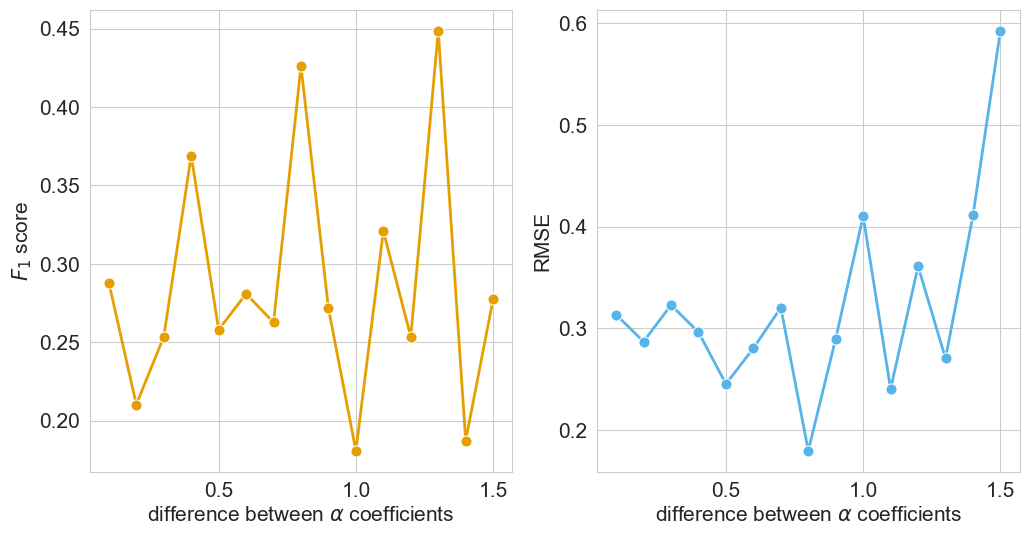

In [5]:
plot_dict(alphas_res, "alpha")

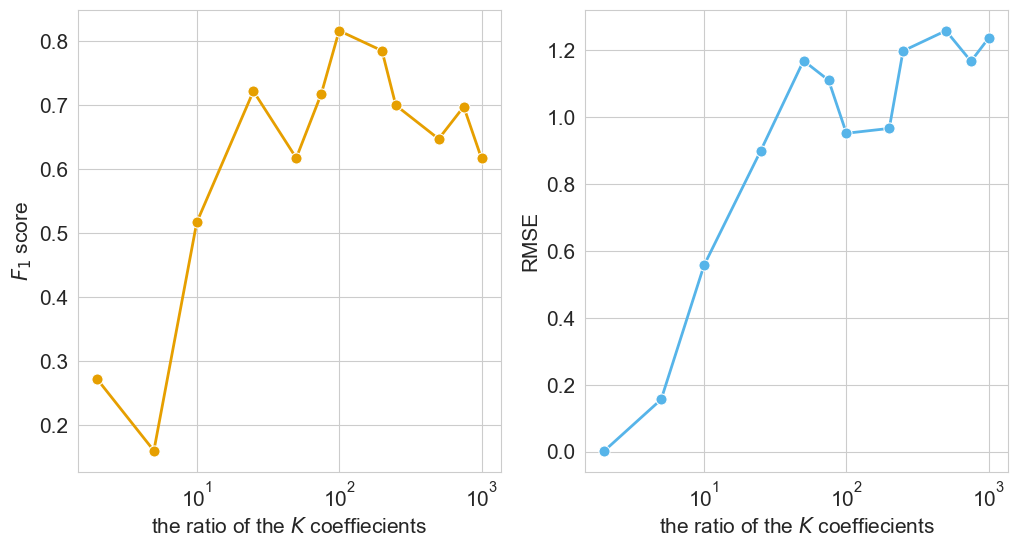

In [7]:
plot_dict(Ds_res, "K")